# **Load the Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('Speakx dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Understanding about the dataset

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Handle Missing Values**

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Finding out the Churn Ratio

In [11]:
print("Yes = ",(df[df['Churn']=='Yes'].shape[0]/df.shape[0]*100))
print("No = ",(df[df['Churn']=='No'].shape[0]/df.shape[0]*100))

Yes =  26.536987079369588
No =  73.4630129206304


In [12]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
print(df['tenure'].max())

72


In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


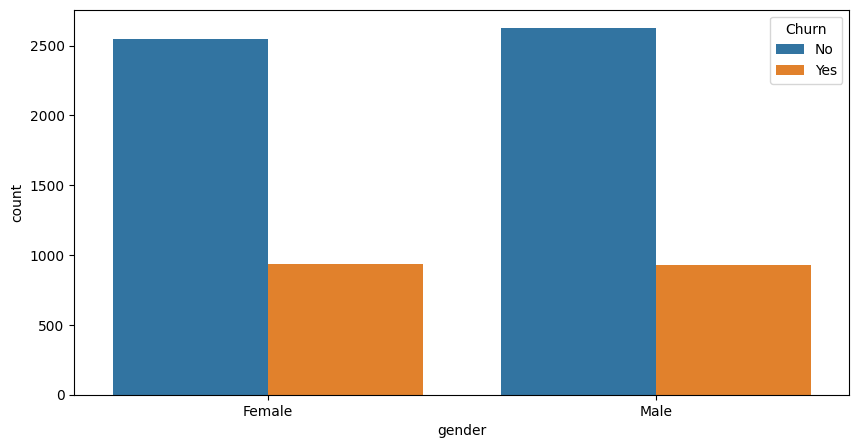

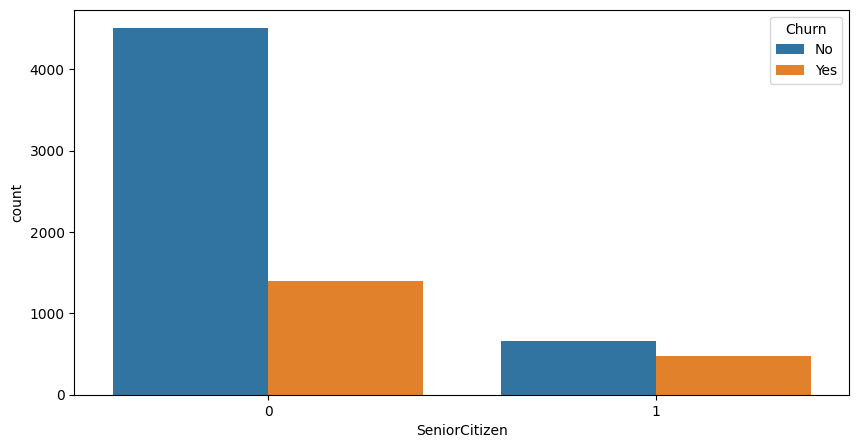

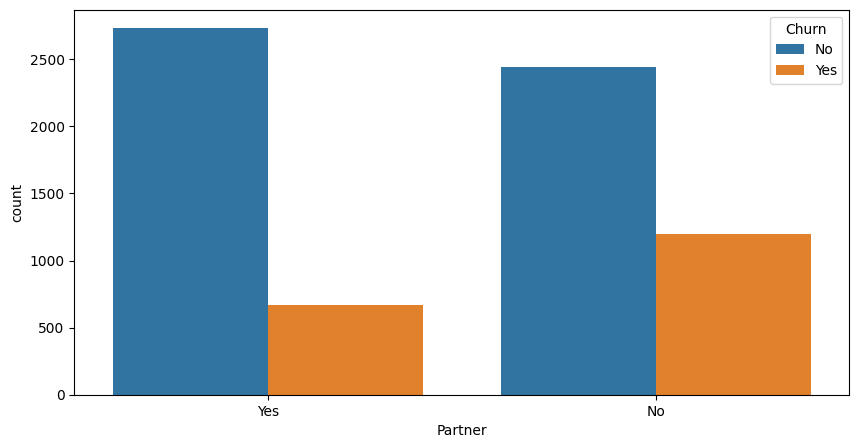

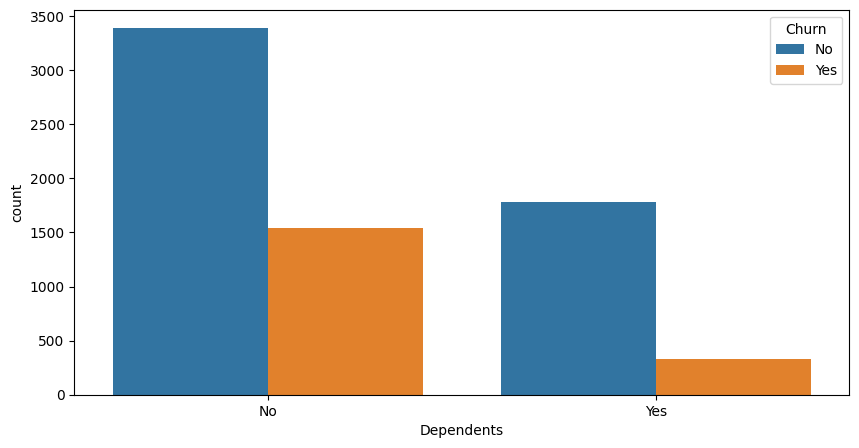

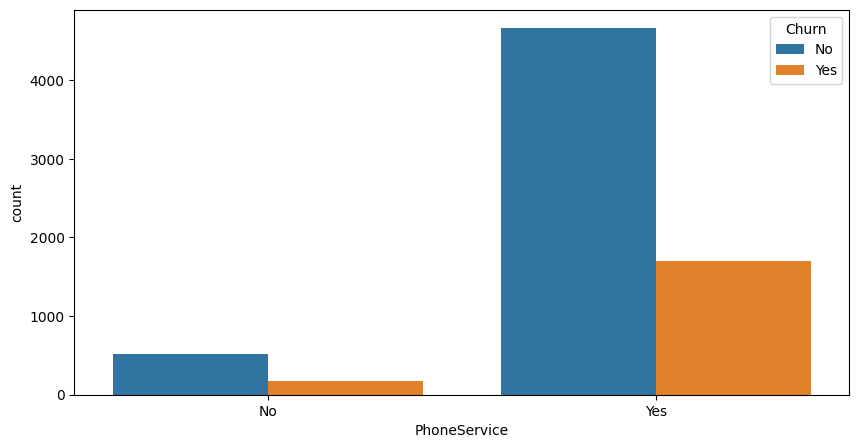

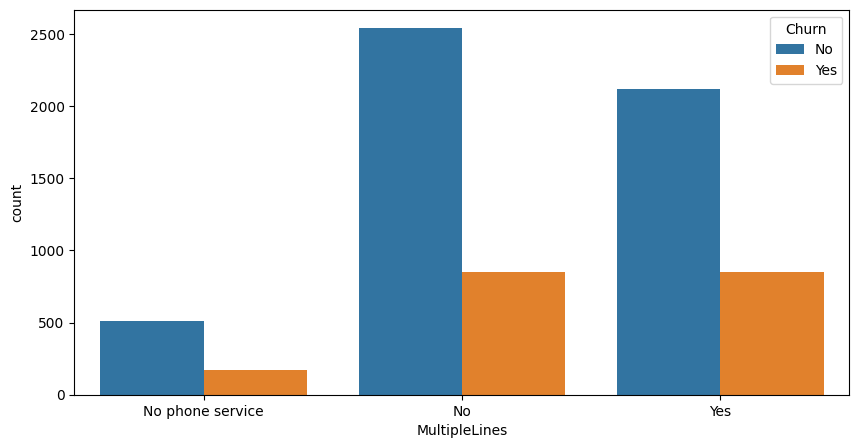

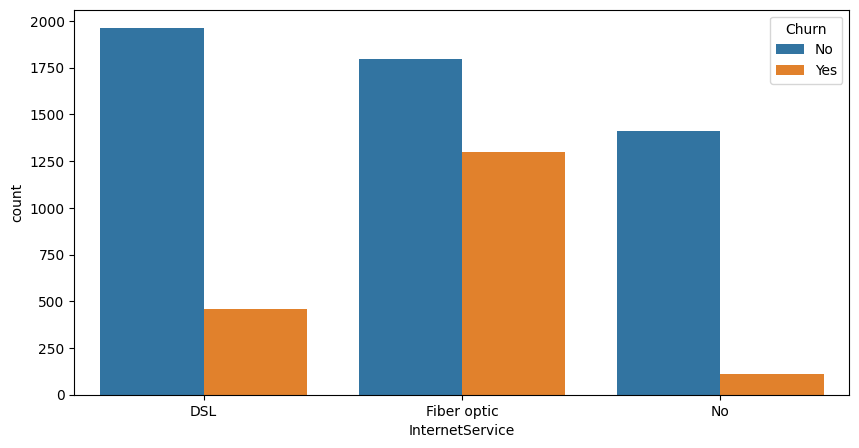

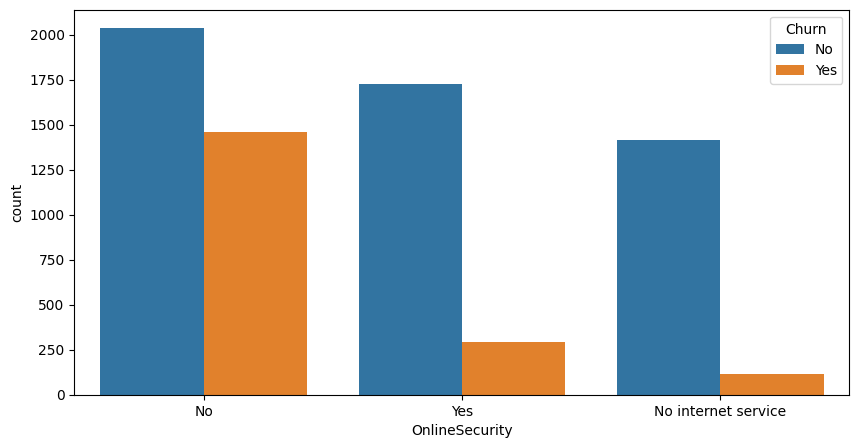

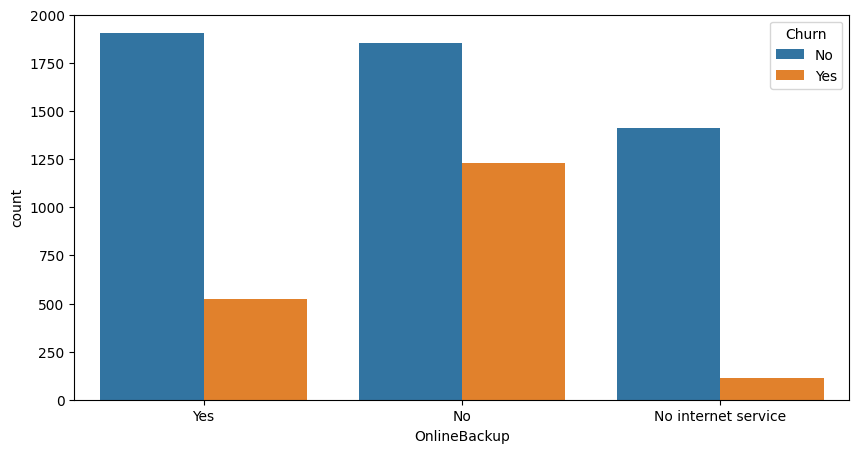

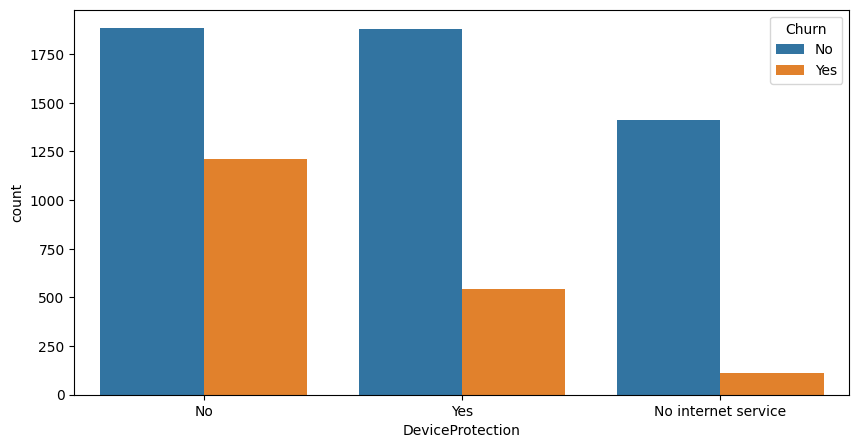

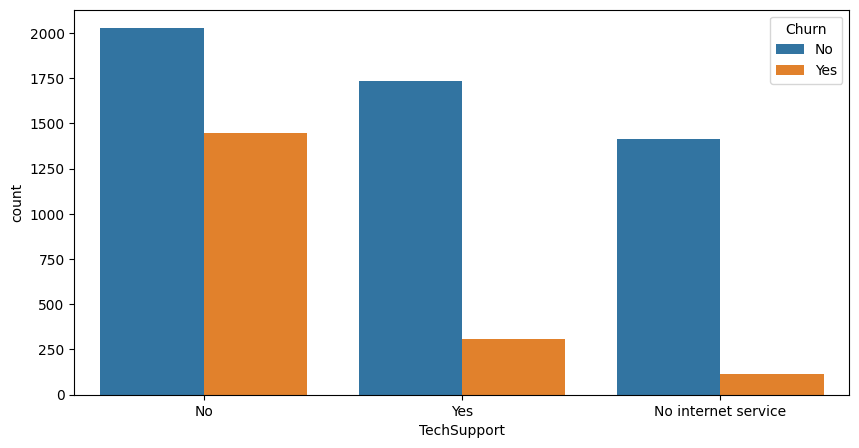

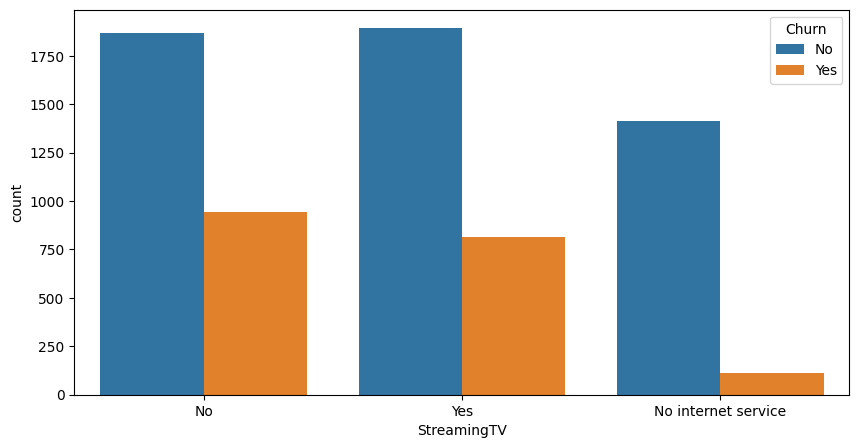

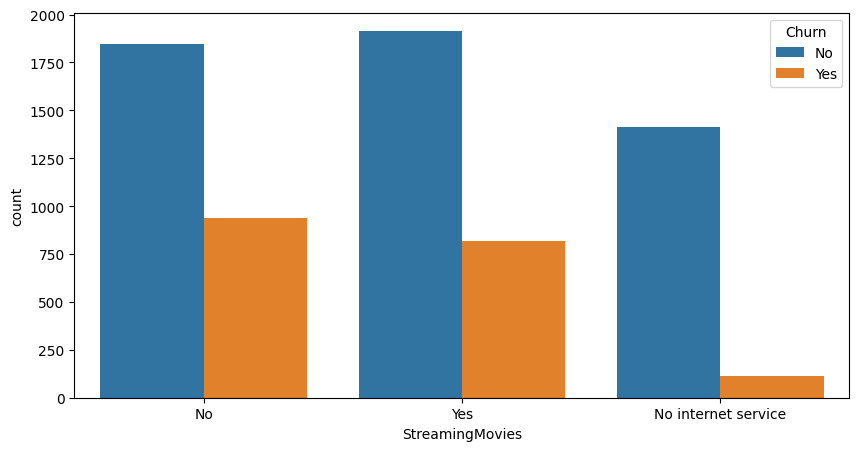

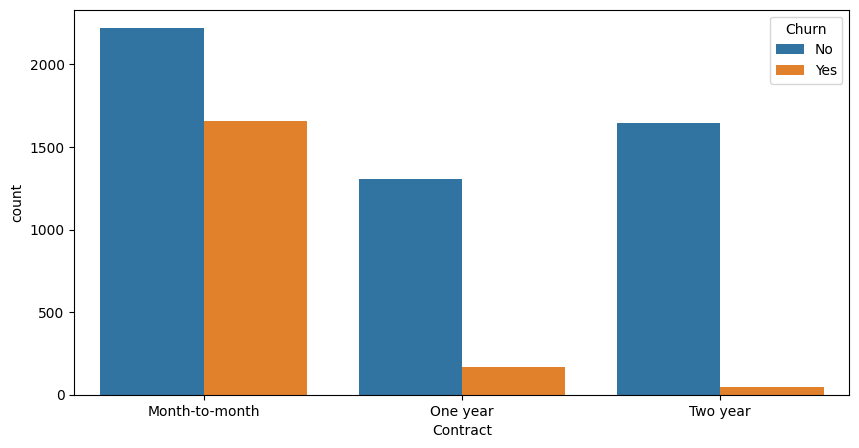

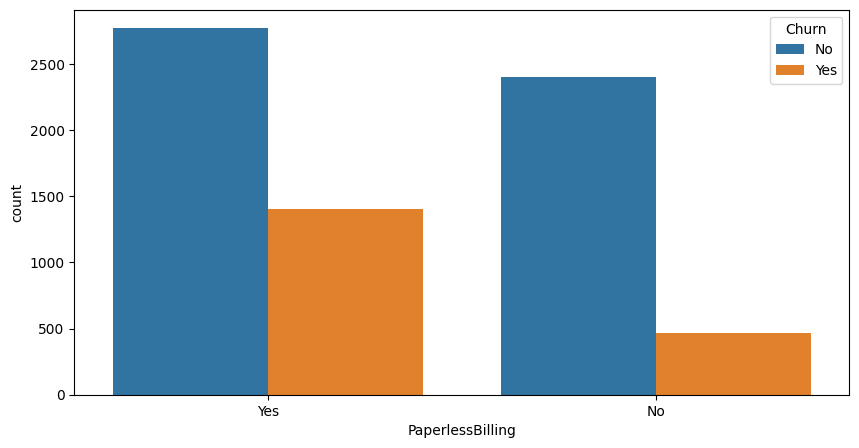

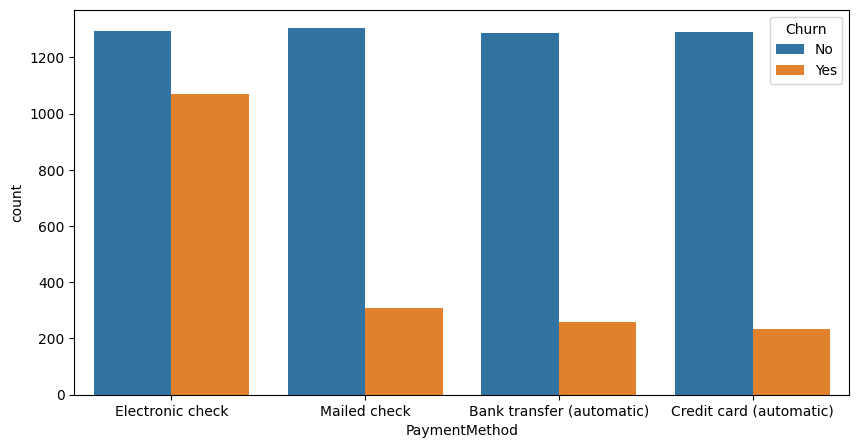

In [15]:
for i in df.columns:
  if i != 'customerID' and i!='Churn' and i!='TotalCharges' and i!='MonthlyCharges' and i!='tenure':
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,data=df,hue='Churn')
    plt.show()

From these Simple Univariate Visualizations we are able to conclude valuable insights which is given in my report.

# **Encode Categorical Variables**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df_cat=df.select_dtypes(include=["object"])
df_num=df.select_dtypes(include=["int64","float64","category"])

In [18]:
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [19]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [23]:
from sklearn.preprocessing import LabelEncoder
encoders={}
for col in df_cat.columns:
  if col != 'customerID':
    le=LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
    encoders[col]=le

df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [24]:
df_new= pd.concat([df_cat, df_num], axis=1)
df_new.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,0,0,1,29.85,29.85
1,5575-GNVDE,1,0,0,1,0,0,2,0,2,...,0,0,1,0,3,0,0,34,56.95,1889.50
2,3668-QPYBK,1,0,0,1,0,0,2,2,0,...,0,0,0,1,3,1,0,2,53.85,108.15
3,7795-CFOCW,1,0,0,0,1,0,2,0,2,...,0,0,1,0,0,0,0,45,42.30,1840.75
4,9237-HQITU,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,1,0,2,70.70,151.65


# **Standardize Numerical Features**

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numcol = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numcol] = scaler.fit_transform(df[numcol])


In [25]:
df_new.drop(['customerID'],axis=1,inplace=True)

# **Performing Exploratory Data Analysis**

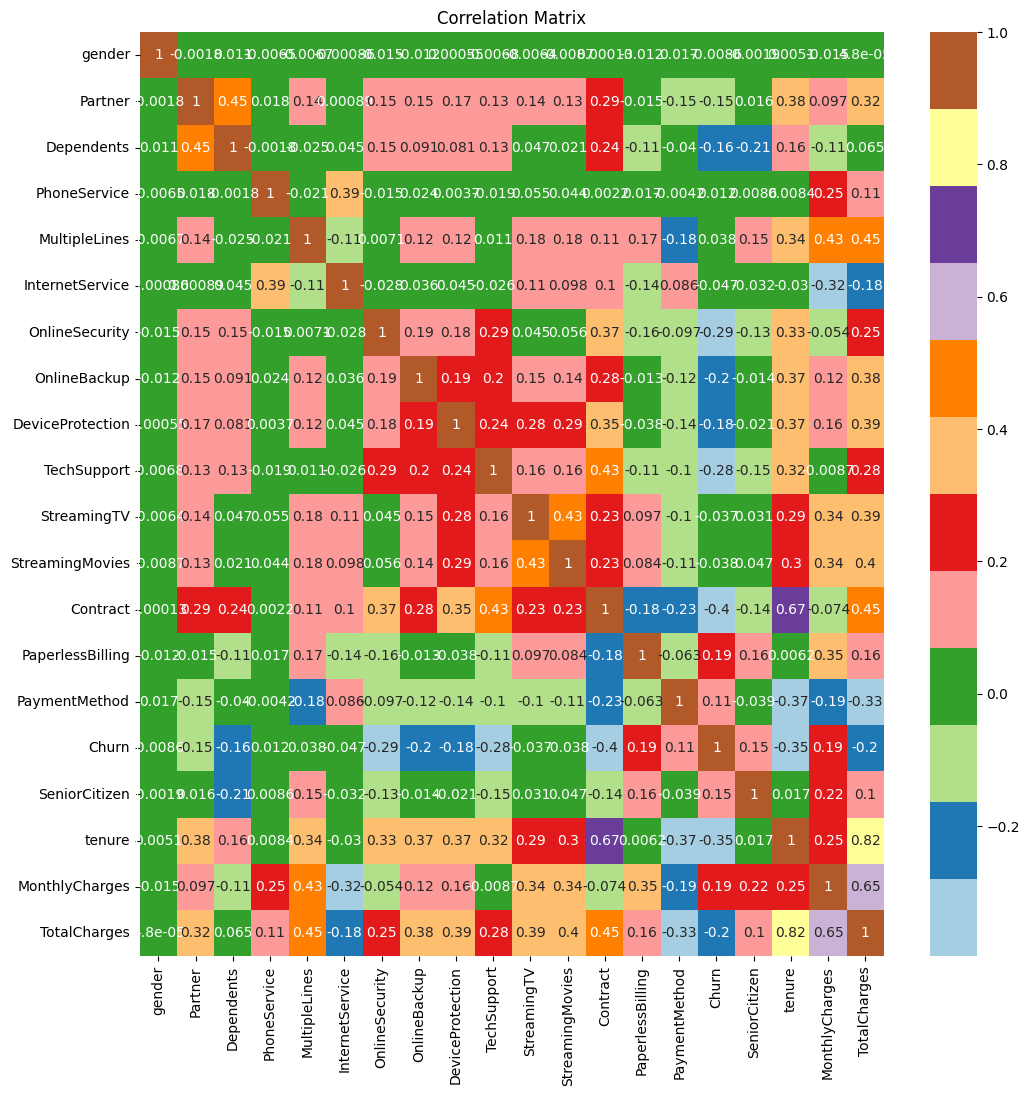

In [26]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_new.corr(), annot=True, cmap="Paired")
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='tenure', ylabel='Density'>

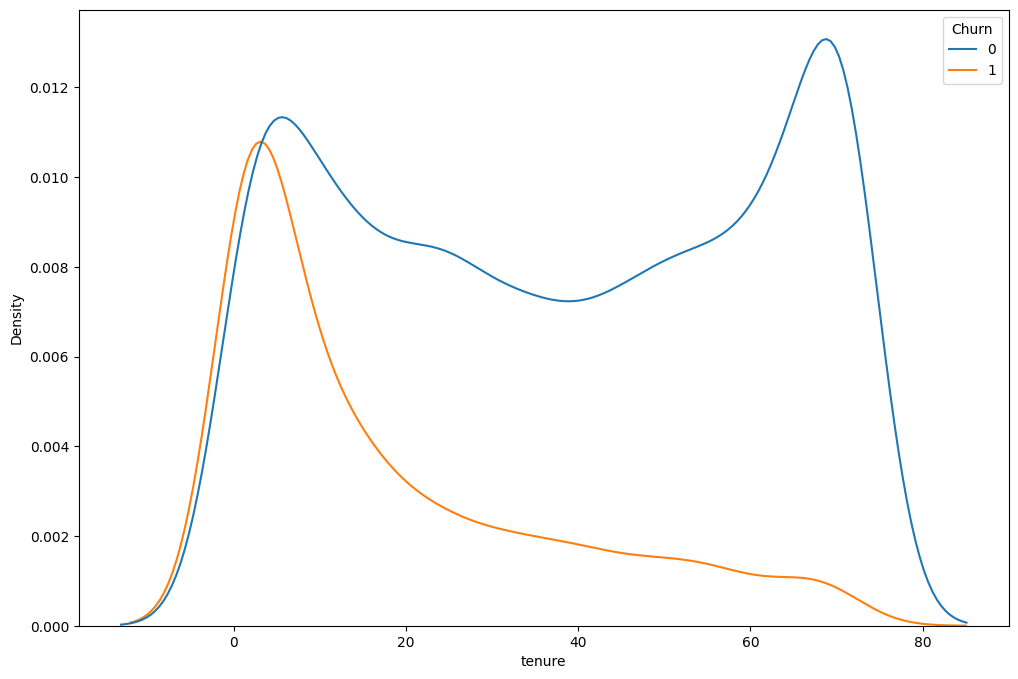

In [27]:
plt.figure(figsize=(12,8))
sns.kdeplot(x=df_new['tenure'],hue=df_new['Churn'])

<ipython-input-28-e9ccd9171853>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  MC = sns.kdeplot(df_new.MonthlyCharges[(df_new["Churn"] == 0) ],
<ipython-input-28-e9ccd9171853>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  MC = sns.kdeplot(df_new.MonthlyCharges[(df_new["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

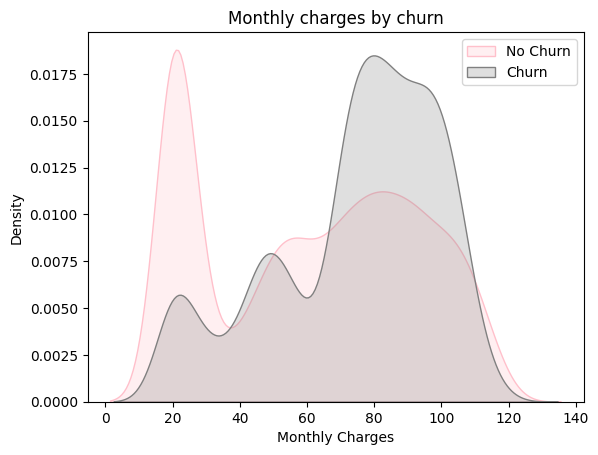

In [28]:
MC = sns.kdeplot(df_new.MonthlyCharges[(df_new["Churn"] == 0) ],
                color="Pink", shade = True)
MC = sns.kdeplot(df_new.MonthlyCharges[(df_new["Churn"] == 1) ],
                ax =MC, color="Grey", shade= True)
MC.legend(["No Churn","Churn"],loc='upper right')
MC.set_ylabel('Density')
MC.set_xlabel('Monthly Charges')
MC.set_title('Monthly charges by churn')


<ipython-input-29-eef61f63f9fb>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  TC = sns.kdeplot(df_new.TotalCharges[(df_new["Churn"] == 0) ],
<ipython-input-29-eef61f63f9fb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  TC = sns.kdeplot(df_new.TotalCharges[(df_new["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

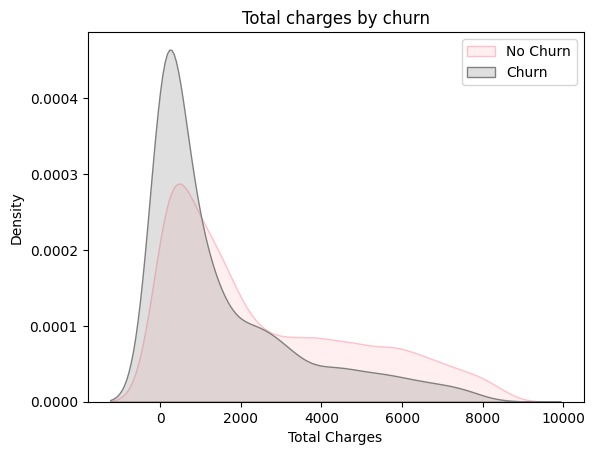

In [29]:
TC = sns.kdeplot(df_new.TotalCharges[(df_new["Churn"] == 0) ],
                color="Pink", shade = True)
TC = sns.kdeplot(df_new.TotalCharges[(df_new["Churn"] == 1) ],
                ax =TC, color="Grey", shade= True)
TC.legend(["No Churn","Churn"],loc='upper right')
TC.set_ylabel('Density')
TC.set_xlabel('Total Charges')
TC.set_title('Total charges by churn')

# **Modelling**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
X = df_new.drop('Churn', axis=1)
y = df_new['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In order to perform predictive analysis we are splitting the data into training and testing parts with a randomness of 50

## **Predictive Model Using Logistic Regression**

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print("Classification Report : \n",classification_report(y_test, y_pred))
print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nAccuracy Score : ",accuracy_score(y_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.62      0.53      0.57       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


Confusion Matrix : 
 [[920 121]
 [173 195]]

Accuracy Score :  0.7913413768630234


## **Predictive Model Using Gradient Boosting**

In [35]:
import xgboost as xgb
gb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
gb_model.fit(X_train, y_train)
y_pred2 = gb_model.predict(X_test)


In [37]:
print("Classification Report :\n ",classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n ",confusion_matrix(y_test,y_pred))
print("\nAccuracy Score : ",accuracy_score(y_test,y_pred))

Classification Report :
                precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.62      0.53      0.57       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


Confusion Matrix :
  [[920 121]
 [173 195]]

Accuracy Score :  0.7913413768630234
